# What are the most optimal skill for Data Analysts to learn

**Methodology**

1. Group skills to determine median salary and likelihood of being in posting
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast
from datasets import load_dataset

#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [19]:
df_DA_UK = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

In [23]:
# filter for job country, job titles and drop nan
df_DA_UK = df_DA_UK.dropna(subset=['salary_year_avg'])

df_DA_UK_exploded = df_DA_UK.explode('job_skills')

df_DA_UK_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
2602,51014.0,excel
2602,51014.0,word
2602,51014.0,outlook
16526,100500.0,sql
16526,100500.0,jupyter


In [37]:
# Grouping the exploded job skills by salary year avg with agg count and median
df_DA_skills = df_DA_UK_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_UK)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,33,98500.0,45.833333
excel,29,75550.0,40.277778
python,25,89100.0,34.722222
tableau,13,100500.0,18.055556
r,9,77017.5,12.500000
go,9,71000.0,12.500000
sas,8,80007.0,11.111111
power bi,7,89100.0,9.722222
outlook,6,53857.0,8.333333


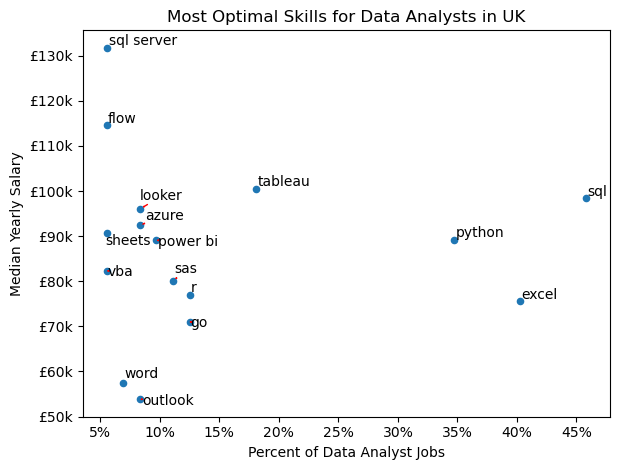

In [39]:
from adjustText import adjust_text


df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in UK')
plt.tight_layout()

# To attach each point with a label
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i],txt))
    
# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r',lw=1))

from matplotlib.ticker import PercentFormatter

# to adjust the y axis parameters
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'£{int(y/1000)}k'))      #pos mean position

# formatting the x axis with percent
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.show()

In [43]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)    #convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value

# remove duplicates by converting values to set them back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict


{'analyst_tools': ['excel',
  'looker',
  'esquisse',
  'ssrs',
  'tableau',
  'ssis',
  'ms access',
  'spreadsheet',
  'outlook',
  'powerbi',
  'sharepoint',
  'nuix',
  'splunk',
  'visio',
  'cognos',
  'word',
  'spss',
  'powerpoint',
  'power bi',
  'msaccess',
  'microstrategy',
  'sap',
  'alteryx',
  'qlik',
  'sas',
  'dax',
  'datarobot',
  'sheets'],
 'programming': ['visualbasic',
  'matlab',
  'go',
  'apl',
  'julia',
  'bash',
  'lua',
  'solidity',
  'typescript',
  'groovy',
  't-sql',
  'kotlin',
  'sql',
  'rust',
  'python',
  'cobol',
  'sass',
  'mongo',
  'fortran',
  'mongodb',
  'swift',
  'r',
  'no-sql',
  'lisp',
  'visual basic',
  'shell',
  'haskell',
  'javascript',
  'f#',
  'erlang',
  'ruby',
  'java',
  'c',
  'c++',
  'scala',
  'golang',
  'delphi',
  'vba',
  'crystal',
  'elixir',
  'html',
  'dart',
  'clojure',
  'vb.net',
  'ocaml',
  'php',
  'css',
  'objective-c',
  'nosql',
  'sas',
  'assembly',
  'powershell',
  'pascal',
  'perl',
  

In [61]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,excel
0,analyst_tools,looker
0,analyst_tools,esquisse
0,analyst_tools,ssrs
0,analyst_tools,tableau
...,...,...
9,sync,google chat
9,sync,rocketchat
9,sync,wire
9,sync,zoom


In [65]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

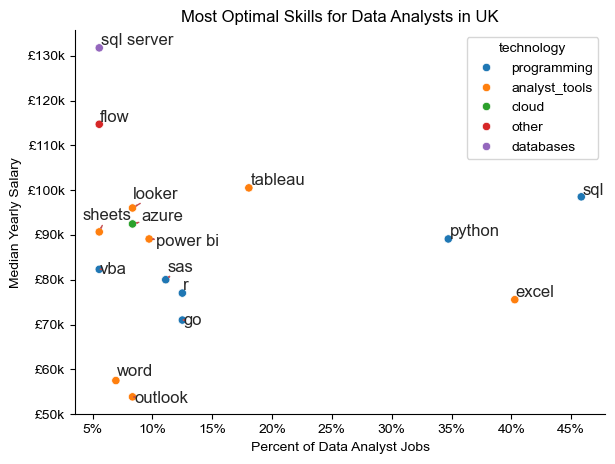

In [69]:
#df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(data=df_plot, 
    x='skill_percent', 
    y='median_salary', 
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in UK')
plt.tight_layout()

# To attach each point with a label
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i],txt))
    
# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r',lw=1))

from matplotlib.ticker import PercentFormatter

# to adjust the y axis parameters
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'£{int(y/1000)}k'))      #pos mean position

# formatting the x axis with percent
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.show()